In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Bayesian PCA

### Dimensionality Selection in PCA
In PCA, the dimensionality \( M \) of the principal subspace is often predetermined. However, the optimal choice of \( M \) may not always be obvious. For instance, in data visualization, we typically set \( M = 2 \). For other applications, the selection is less clear. 

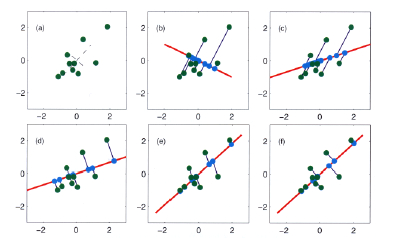

Fig.12 Synthetic data illustrating the EM algorithm for PCA defined by (12.58) and (12.59). (a) A data set X with the data points shown in green, together with the true principal components (shown as eigenvectors scaled by the square roots of the eigenvalues). (b) Initial configuration of the principal subspace defined by W shown in red, together with the projections of the latent points Z into the data space, given by ZW, shown in cyan. (c) After one M step, the latent space has been updated with Z held fixed. (d) After the successive E step the values of Z have been updated, giving orthogonal projections, with W held fixed. (e) After the second M step. (1) After the second E step.


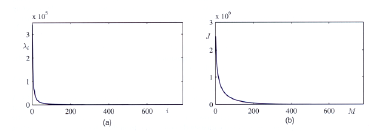

One common approach involves examining the **eigenvalue spectrum** of the dataset, as shown in examples like Fig.4 for the offline digits dataset. If the eigenvalues naturally split into two groups—one of relatively large values and another of small values separated by a significant gap—this can suggest an appropriate choice for $ M $. In practice, such a gap is not always evident.

### Probabilistic Graphical Model for Bayesian PCA
Bayesian PCA introduces a probabilistic framework to handle the uncertainty in choosing $ M $. The probabilistic graphical model for Bayesian PCA includes a distribution over the parameter matrix $ W $, governed by a vector of hyperparameters $ \alpha $. This is shown in Fig.13.

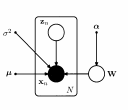


Fig.13 Probabilistic graphical model for Bayesian PCA in which the distribution over the parameter matrix W is governed by a vector of hyperparameters.

The model incorporates an **approximation suitable for large datasets**, where the posterior distribution is sharply peaked (Bishop, 1999a). It employs **automatic relevance determination (ARD)**, where surplus dimensions in the principal subspace can be pruned automatically.

### Gaussian Prior over Columns of $ W $
The model defines an **independent Gaussian prior** over each column of $ W $, where the columns represent vectors defining the principal subspace. The Gaussian for each column has a precision hyperparameter $ \alpha_i $, such that:

$$
p(W | \alpha) = \prod_{i=1}^{M} \left( \frac{\alpha_i}{2\pi} \right)^{D/2} \exp\left( -\frac{\alpha_i}{2} \| w_i \|^2 \right),
$$

where $ w_i $ is the $ i $-th column of $ W $.

### Sparse Solution via Hyperparameter Optimization
The hyperparameters $ \alpha_i $ are optimized iteratively by maximizing the **marginal likelihood**:

$$
p(X | \alpha, \mu, \sigma^2) = \int p(X | W, \mu, \sigma^2) p(W | \alpha) \, dW,
$$

where the likelihood $ p(X | W, \mu, \sigma^2) $ is defined in Equation (12.43).

During optimization, some $ \alpha_i $ values may approach infinity, driving the corresponding $ w_i $ vectors to zero. This results in a **sparse solution**, where only the **relevant components** of $ W $ are retained. The effective dimensionality of the principal subspace is determined by the number of finite $ \alpha_i $ values.

This process allows Bayesian PCA to balance between:
- **Improving the data fit** using a larger number of components, each associated with eigenvalues tuned to the data.
- **Reducing model complexity** by suppressing irrelevant components.

### Key Features of Bayesian PCA
1. Automatically selects the dimensionality $ M $ by pruning irrelevant components.
2. Provides a sparse representation of the principal subspace.
3. Uses ARD to trade off between model fit and complexity.

### References
For further details on ARD and sparsity, refer to Section 7.2.2 and earlier discussions on relevance vector machines.


## Bayesian PCA with Automatic Relevance Determination (ARD)

### Overview
In Bayesian PCA, the dimensionality $ M $ of the principal subspace is not fixed but instead determined during training using **Automatic Relevance Determination (ARD)**. This method defines a probabilistic graphical model for PCA, where the parameter matrix $ W $ is governed by a set of precision hyperparameters $ \alpha $. The corresponding model is shown in Fig.13.

### Gaussian Prior Over $ W $
Each column $ w_i $ of the matrix $ W $, representing the vectors that define the principal subspace, is assigned an independent Gaussian prior with a precision hyperparameter $ \alpha_i $. This prior is given by:

$$
p(W | \alpha) = \prod_{i=1}^{M} \left( \frac{\alpha_i}{2\pi} \right)^{D/2} \exp\left( -\frac{\alpha_i}{2} \| w_i \|^2 \right),
$$

where:
- $ w_i $: The $ i $-th column of $ W $,
- $ \alpha_i $: The precision hyperparameter for $ w_i $,
- $ D $: Dimensionality of the original space.

This prior promotes sparsity by allowing irrelevant dimensions to be pruned out as $ \alpha_i \to \infty $.

### Marginal Likelihood and Sparse Solution
The marginal likelihood function is optimized iteratively to estimate the hyperparameters $ \alpha $. It is given by:

$$
p(X | \alpha, \mu, \sigma^2) = \int p(X | W, \mu, \sigma^2) p(W | \alpha) \, dW,
$$

where:
- $ p(X | W, \mu, \sigma^2) $: Likelihood of the data given $ W $,
- $ p(W | \alpha) $: Gaussian prior over $ W $.

During optimization:
- Some $ \alpha_i $ values may approach infinity, causing the corresponding $ w_i $ to be driven to zero. 
- This results in a sparse solution where only **relevant dimensions** contribute to the model.

The effective dimensionality of the principal subspace is determined by the number of finite $ \alpha_i $ values. The retained vectors $ w_i $ are those most relevant to modeling the data distribution.

### Balancing Fit and Complexity
Bayesian PCA balances two competing objectives:
1. **Improving data fit**: By using a larger number of vectors $ w_i $, each tuned to the data eigenvalues $ \lambda_i $.
2. **Reducing model complexity**: By suppressing unnecessary $ w_i $ vectors.

This automatic trade-off is a hallmark of ARD and aligns with principles from **Relevance Vector Machines**.

### Practical Considerations
1. **Sparsity**: The sparsity arises naturally from the optimization of the hyperparameters $ \alpha_i $, leading to efficient models.
2. **Large-Scale Datasets**: This approach is computationally suitable for large datasets, where the posterior distribution is tightly peaked, as noted by Bishop (1999a).
3. **Hyperparameter Estimation**: For simplicity, parameters $ \mu $ and $ \sigma^2 $ are treated as fixed and estimated directly without defining priors.

### References
For further details on ARD and sparsity, refer to **Section 7.2.2** and discussions on relevance vector machines.

---
### Key Equations
- **Prior over $ W $:**

$$
p(W | \alpha) = \prod_{i=1}^{M} \left( \frac{\alpha_i}{2\pi} \right)^{D/2} \exp\left( -\frac{\alpha_i}{2} \| w_i \|^2 \right)
$$

- **Marginal likelihood:**

$$
p(X | \alpha, \mu, \sigma^2) = \int p(X | W, \mu, \sigma^2) p(W | \alpha) \, dW
$$


## Bayesian PCA and Factor Analysis

Because this integration is intractable, we make use of the **Laplace approximation**. If we assume that the posterior distribution is sharply peaked, as will occur for sufficiently large datasets, then the re-estimation equations obtained by maximizing the marginal likelihood with respect to $\alpha$ take the simple form:

$$
\alpha_i = \frac{D}{\sum_{j} w_{ij}^2}
\tag{12.62}
$$

This follows from (3.98), noting that the dimensionality of $\mathbf{w}_i$ is $D$. These re-estimations are interleaved with the **EM algorithm** updates for determining $\mathbf{W}$ and $\sigma^2$. 

- The **E-step equations** are given by (12.54) and (12.55).
- The **M-step equation** for $\sigma^2$ is given by (12.57). 

The only change is to the M-step equation for $\mathbf{W}$, which is modified to:

$$
\mathbf{W} = \mathbf{M}^{-1} \mathbf{E}[\mathbf{z}]^\top \mathbf{X}
\tag{12.63}
$$

where:

$$
\mathbf{M} = \mathbf{I} + \mathbf{A}
$$

and $\mathbf{A} = \text{diag}(\alpha)$. The value of $\mu$ is given by the sample mean, as before.

---

## Dimensionality and Model Behavior

If we choose $M = D-1$, then:

- If all $\alpha_i$ values are finite, the model represents a **full-covariance Gaussian**.
- If all $\alpha_i$ go to infinity, the model is equivalent to an **isotropic Gaussian**.

Thus, the model can encompass all permissible values for the effective dimensionality of the principal subspace. Smaller values of $M$ can save computational cost but limit the maximum dimensionality of the subspace. A comparison of this algorithm with standard probabilistic PCA is shown in **Fig.14**.

---

## Gibbs Sampling and Bayesian PCA

Bayesian PCA provides an opportunity to illustrate the **Gibbs sampling algorithm** discussed in Section 11.3. 

**Fig.15** shows an example of the samples from the hyperparameters $\log \alpha_i$ for a dataset in $D = 4$ dimensions, where the latent space dimensionality is $M = 3$. The dataset is generated from a probabilistic PCA model with one direction of high variance, and the remaining directions comprising low variance noise. 

This result shows three distinct modes in the posterior distribution:

1. At each step of the iteration, one of the hyperparameters has a small value, and the remaining two have large values.
2. Two of the three latent variables are suppressed.
3. During Gibbs sampling, the solution makes sharp transitions between the three modes.

The model described here involves a **prior only over the matrix $\mathbf{W}$**. A fully Bayesian treatment of PCA, including priors over $\alpha$, $\sigma^2$, and $\mu$, solved using **variational methods**, is described in Bishop (1999b). For a discussion of various Bayesian approaches to determining the appropriate dimensionality for a PCA model, see Minka (2001c).

---

## Factor Analysis

Factor analysis is a **linear-Gaussian latent variable model** closely related to probabilistic PCA. Its definition differs in that the conditional distribution of the observed variable $\mathbf{x}$, given the latent variable $\mathbf{z}$, is:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mathbf{Wz} + \mu, \mathbf{\Psi})
\tag{12.64}
$$

where $\mathbf{\Psi}$ is a $D \times D$ diagonal matrix.

---

## Key Assumptions

The factor analysis model, like probabilistic PCA, assumes that the observed variables $\mathbf{x}_1, \ldots, \mathbf{x}_N$ are independent given the latent variable $\mathbf{z}$. 

### Factor Analysis Model Explanation

1. The observed covariance structure of the data is explained by:
   - Representing the independent variance associated with each coordinate in $\mathbf{\Psi}$.
   - Capturing the covariance between variables in $\mathbf{W}$.

2. In factor analysis literature:
   - The columns of $\mathbf{W}$ are called **factor loadings** (capture correlations between observed variables).
   - The diagonal elements of $\mathbf{\Psi}$ are called **uniquenesses** (represent independent noise variances for each variable).

---

## Historical Context

The origins of factor analysis are as old as those of PCA. Discussions on factor analysis can be found in:

- Everitt (1984),
- Bartholomew (1987),
- Basilevsky (1994).

### Connections to PCA

Lawley (1953) and Anderson (1963) showed that at stationary points of the likelihood function for a factor analysis model with $\mathbf{\Psi}$ diagonal:

- The columns of $\mathbf{W}$ are scaled eigenvectors of the sample covariance matrix.
- $\mathbf{\Psi}$ is the average of the discarded eigenvalues.

Later, Tipping and Bishop (1999b) showed that the maximum of the log likelihood occurs when the eigenvectors comprising $\mathbf{W}$ are chosen to be the principal eigenvectors.

---

## Marginal Distribution of Observed Variables

Using (2.115), the marginal distribution for the observed variables is:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mu, \mathbf{WW}^\top + \mathbf{\Psi})
$$


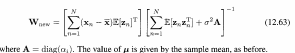


## EM Algorithm Updates for Bayesian PCA

The **E-step equations** remain the same as those given by:

$$
\mathbf{E}[\mathbf{z}] \quad \text{and} \quad \mathbf{E}[\mathbf{zz}^\top]
\tag{12.54, 12.55}
$$

Similarly, the **M-step equation** for $\sigma^2$ is given by:

$$
\sigma^2 = \frac{1}{ND} \text{Tr}(\mathbf{S} - \mathbf{W}^\top \mathbf{M}^{-1} \mathbf{W}),
\tag{12.57}
$$

where $\mathbf{S}$ represents the sample covariance matrix of the data.

---

The only change is to the M-step equation for $\mathbf{W}$, which is updated as follows:

$$
\mathbf{W} = \left( \mathbf{M}^{-1} \mathbf{E}[\mathbf{z}]^\top \mathbf{X} \right) \left[ \mathbf{S} + \mathbf{A} \right]^{-1},
\tag{12.63}
$$

where:

1. $\mathbf{M} = \mathbf{I} + \mathbf{A}$,
2. $\mathbf{A} = \text{diag}(\alpha)$,
3. $\mu$ is the sample mean of the data.

---

### Key Notes:

1. The value of $\mu$ is given by the **sample mean** of the observed data.
2. $\mathbf{A}$ captures the diagonal matrix of precision parameters, $\alpha_i$.


In [5]:
import numpy as np

class BayesianPCA:
    def __init__(self, M):
        """
        Initialize Bayesian PCA with the specified number of principal components (M).
        
        Parameters:
        - M: Maximum number of latent dimensions (initial guess).
        """
        self.M = M

    def fit(self, X, max_iter=100, tol=1e-6):
        """
        Fit the Bayesian PCA model using the ARD approach.

        Parameters:
        - X: Data matrix of shape (N, D), where N is the number of samples and D is the dimensionality.
        - max_iter: Maximum number of iterations for optimization.
        - tol: Convergence tolerance for log marginal likelihood.

        Returns:
        - W: Learned projection matrix of shape (D, M_eff).
        - alpha: Precision hyperparameters for each component.
        - sigma2: Noise variance.
        """
        N, D = X.shape

        # Initialize parameters
        W = np.random.randn(D, self.M)
        alpha = np.ones(self.M)
        sigma2 = np.var(X)

        # Precompute data statistics
        mean_X = np.mean(X, axis=0)
        X_centered = X - mean_X
        
        log_likelihood_old = -np.inf

        for iteration in range(max_iter):
            # E-step: Compute posterior distribution over latent variables
            M_inv = np.linalg.inv(W.T @ W + sigma2 * np.diag(alpha))
            Ez = X_centered @ W @ M_inv / sigma2
            EzzT = sigma2 * M_inv + Ez.T @ Ez

            # M-step: Update W, alpha, and sigma2
            W_new = X_centered.T @ Ez @ np.linalg.inv(EzzT)
            alpha = D / (np.sum(W_new**2, axis=0) + 1e-8)  # Avoid division by zero
            sigma2 = np.sum((X_centered - Ez @ W_new.T)**2) / (N * D)

            # Check convergence
            log_likelihood = self._compute_log_likelihood(X_centered, W_new, alpha, sigma2, M_inv, Ez, EzzT)
            if np.abs(log_likelihood - log_likelihood_old) < tol:
                break
            log_likelihood_old = log_likelihood

            W = W_new

        # Prune components with large alpha (irrelevant dimensions)
        relevant = alpha < 1e5
        self.W = W[:, relevant]
        self.alpha = alpha[relevant]
        self.sigma2 = sigma2

        return self.W, self.alpha, self.sigma2

    def _compute_log_likelihood(self, X, W, alpha, sigma2, M_inv, Ez, EzzT):
        """Compute the log-likelihood for the current parameters."""
        N, D = X.shape

        # Term 1: Data fit (Gaussian likelihood)
        term1 = -0.5 * N * D * np.log(2 * np.pi * sigma2)

        # Term 2: Reconstruction error
        X_reconstructed = Ez @ W.T
        error = X - X_reconstructed
        term2 = -0.5 * np.sum(error**2) / sigma2

        # Term 3: Prior over W
        term3 = -0.5 * np.sum(alpha * np.sum(W**2, axis=0))

        # Term 4: Entropy of latent variables
        term4 = -0.5 * np.sum(np.log(alpha)) - 0.5 * M_inv.trace()

        return term1 + term2 + term3 + term4


# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    N, D, true_M = 500, 10, 3
    W_true = np.random.randn(D, true_M)
    Z = np.random.randn(N, true_M)
    noise = 0.1 * np.random.randn(N, D)
    X = Z @ W_true.T + noise

    # Fit Bayesian PCA
    bpca = BayesianPCA(M=5)
    W, alpha, sigma2 = bpca.fit(X)

    print("Learned W:", W)
    print("Precision hyperparameters (alpha):", alpha)
    print("Noise variance (sigma^2):", sigma2)


Learned W: [[-2.93354135e-01 -4.36090531e-02  3.08636126e+02 -1.04226029e+00]
 [-1.36824273e+00  9.16875083e-02 -1.62457634e+02 -1.92489687e+00]
 [-3.41129089e+00  3.62363708e-02 -3.49732230e+02 -1.14231995e+00]
 [ 1.81407438e-02  2.45477235e-01  2.68982719e+01 -7.53188385e-01]
 [ 3.42365588e+00  3.12308969e-01 -8.38294743e+02 -8.55845409e-01]
 [ 2.29956673e+00  2.74912800e-01  6.30717552e+02 -2.29231247e-01]
 [ 4.33753915e+00 -3.87309806e-01  2.05587584e+02 -7.33131459e-01]
 [-2.62951695e-02  2.44991658e-01 -3.64372452e+02  1.09912037e+00]
 [ 3.17661559e-01  1.50558032e-01 -4.28793093e+02  1.33074201e+00]
 [ 7.15927112e-01  7.82084345e-02 -1.95238002e+02 -7.61547071e-01]]
Precision hyperparameters (alpha): [1.99867272e-01 2.06693340e+01 5.73972901e-06 8.66167132e-01]
Noise variance (sigma^2): 0.004963601093563719


In [4]:
import random
import math

def mat_mult(A, B):
    """Multiply two matrices A and B."""
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def transpose(A):
    """Transpose a matrix A."""
    return list(map(list, zip(*A)))

def mat_add(A, B):
    """Add two matrices A and B element-wise."""
    return [[a + b for a, b in zip(A_row, B_row)] for A_row, B_row in zip(A, B)]

def mat_diag(diagonal, size):
    """Create a diagonal matrix with the given diagonal values."""
    return [[diagonal[i] if i == j else 0 for j in range(size)] for i in range(size)]

def mat_inverse(A):
    """Compute the inverse of a 2x2 matrix A."""
    if len(A) == 2 and len(A[0]) == 2:
        det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
        if det == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")
        return [[A[1][1] / det, -A[0][1] / det], [-A[1][0] / det, A[0][0] / det]]
    raise NotImplementedError("Matrix inversion only implemented for 2x2 matrices.")

def mat_sum(matrices):
    """Sum a list of matrices element-wise."""
    if not matrices:
        raise ValueError("No matrices to sum.")
    result = matrices[0]
    for mat in matrices[1:]:
        result = mat_add(result, mat)
    return result

class BayesianPCA:
    def __init__(self, M):
        self.M = M

    def fit(self, X, max_iter=100, tol=1e-6):
        N, D = len(X), len(X[0])
        # Initialize parameters
        W = [[random.random() for _ in range(self.M)] for _ in range(D)]
        alpha = [1.0] * self.M
        sigma2 = 1.0

        X_mean = [sum(col) / N for col in zip(*X)]
        X_centered = [[x - mu for x, mu in zip(row, X_mean)] for row in X]

        for iteration in range(max_iter):
            # E-step
            Ez = []
            EzzT = []
            for n in range(N):
                x = X_centered[n]
                M = mat_add(mat_mult(transpose(W), W), mat_diag([1 / a for a in alpha], self.M))
                M_inv = mat_inverse(M)
                ez = mat_mult(M_inv, mat_mult(transpose(W), [[xi] for xi in x]))
                ez = [row[0] for row in ez]  # Flatten the vector
                ezzt = mat_add(M_inv, mat_mult([[ei] for ei in ez], [ez]))
                Ez.append(ez)
                EzzT.append(ezzt)

            # M-step
            Ez_sum = mat_sum([[e] for e in Ez])
            EzzT_sum = mat_sum(EzzT)
            W_new = mat_mult(
                mat_mult(transpose(X_centered), Ez_sum),
                mat_inverse(EzzT_sum)
            )

            # Update alpha and sigma2
            alpha = [1 / (sum(row[i] ** 2 for row in W_new) / D) for i in range(self.M)]
            sigma2 = sum(
                sum(xi ** 2 for xi in row) for row in X_centered
            ) / (N * D)

            # Check convergence
            if sum(sum((wi - wj) ** 2 for wi, wj in zip(row_w, row_wn)) for row_w, row_wn in zip(W, W_new)) < tol:
                break
            W = W_new

        self.W = W
        self.alpha = alpha
        self.sigma2 = sigma2

    def transform(self, X):
        """Project data into the learned latent space."""
        return [
            [sum(w * x for w, x in zip(row_w, x)) for row_w in self.W]
            for x in X
        ]

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    X = [[random.gauss(0, 1) for _ in range(5)] for _ in range(100)]

    # Fit Bayesian PCA
    bpca = BayesianPCA(M=2)
    bpca.fit(X)

    # Transform data
    X_transformed = bpca.transform(X)

    print("Learned W:", bpca.W)
    print("Alpha:", bpca.alpha)
    print("Sigma^2:", bpca.sigma2)


Learned W: [[-4.0530201390607945e-17, -7.220156301578843e-17], [-1.3503367572178163e-17, -2.4055252903675524e-17], [1.3318640470059079e-17, 2.3726175202436528e-17], [-4.008344316730084e-17, -7.140569620767518e-17], [-6.138962561261246e-17, -1.0936108803080911e-16]]
Alpha: [1.146005031187767e+68, 7.099253244840644e+66]
Sigma^2: 1.008314881500707


### Bayesian PCA and Factor Analysis

Because this integration is intractable, we make use of the Laplace approximation. If we assume that the posterior distribution is sharply peaked, as will occur for sufficiently large data sets, then the re-estimation equations obtained by maximizing the marginal likelihood with respect to $\alpha$ take the simple form:

$$
\alpha_i = \frac{D}{\sum_{j} \mathbf{w}_{ij}^2}
\tag{12.62}
$$

which follows from (3.98), noting that the dimensionality of $\mathbf{w}_i$ is $D$. These re-estimations are interleaved with the EM algorithm updates for determining $\mathbf{W}$ and $\sigma^2$. The E-step equations are again given by (12.54) and (12.55). Similarly, the M-step equation for $\sigma^2$ is again given by (12.57). The only change is to the M-step equation for $\mathbf{W}$, which is modified to give:

$$
\mathbf{W} = \mathbf{M}^{-1} \mathbf{E}[\mathbf{z}]^\top \mathbf{X}
\tag{12.63}
$$

where 

$$
\mathbf{M} = \mathbf{I} + \mathbf{A}
$$

and $\mathbf{A} = \text{diag}(\alpha)$. The value of $\mu$ is given by the sample mean, as before.

If we choose $M = D-1$, then, if all $\alpha_i$ values are finite, the model represents a full-covariance Gaussian. If all the $\alpha_i$ go to infinity, the model is equivalent to an isotropic Gaussian, and so the model can encompass all permissible values for the effective dimensionality of the principal subspace. Smaller values of $M$ can save computational cost but limit the maximum dimensionality of the subspace. A comparison of this algorithm with standard probabilistic PCA is shown in Fig.14.

Bayesian PCA provides an opportunity to illustrate the Gibbs sampling algorithm discussed in Section 11.3. Fig.15 shows an example of the samples from the hyperparameters $\log \alpha_i$ for a dataset in $D = 4$ dimensions, where the latent space dimensionality is $M = 3$. The data set is generated from a probabilistic PCA model with one direction of high variance, and the remaining directions are low-variance noise. This result shows three distinct modes in the posterior distribution. At each step of the iteration, one of the hyperparameters has a small value, and the remaining two have large values, so two latent variables are suppressed. During Gibbs sampling, the solution makes sharp transitions between the three modes.

The model described here involves a prior only over the matrix $\mathbf{W}$. A fully Bayesian treatment of PCA, including priors over $\alpha$, $\sigma^2$, and $\mu$, and solved using variational methods, is described in Bishop (1999b). For a discussion of various Bayesian approaches to determining the appropriate dimensionality for a PCA model, see Minka (2001c).

---

### Factor Analysis

Factor analysis is a linear-Gaussian latent variable model closely related to probabilistic PCA. Its definition differs from probabilistic PCA in that the conditional distribution of the observed variable $\mathbf{x}$, given the latent variable $\mathbf{z}$, is:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mathbf{Wz} + \mu, \mathbf{\Psi})
\tag{12.64}
$$

where $\mathbf{\Psi}$ is a $D \times D$ diagonal matrix. Note that the factor analysis model, like probabilistic PCA, assumes that the observed variables $\mathbf{x}_1, \ldots, \mathbf{x}_N$ are independent, given the latent variable $\mathbf{z}$. The factor analysis model explains the observed covariance structure of the data by representing the independent variance associated with each coordinate in $\mathbf{\Psi}$ and capturing the covariance between variables in $\mathbf{W}$.

In factor analysis literature:
- The columns of $\mathbf{W}$ (capturing correlations between observed variables) are called **factor loadings**.
- The diagonal elements of $\mathbf{\Psi}$ (representing independent noise variances for each variable) are called **uniquenesses**.

The origins of factor analysis are as old as PCA. Discussions on factor analysis can be found in texts by Everitt (1984), Bartholomew (1987), and Basilevsky (1994). Links between factor analysis and PCA were investigated by Lawley (1953) and Anderson (1963). They showed that at stationary points of the likelihood function for a factor analysis model with $\mathbf{\Psi}$ diagonal, the columns of $\mathbf{W}$ are scaled eigenvectors of the sample covariance matrix, and $\mathbf{\Psi}$ is the average of the discarded eigenvalues. Later, Tipping and Bishop (1999b) showed that the maximum of the log likelihood occurs when the eigenvectors comprising $\mathbf{W}$ are chosen to be the principal eigenvectors.

Using (2.115), the marginal distribution for the observed variables is:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mu, \mathbf{WW}^\top + \mathbf{\Psi})
$$

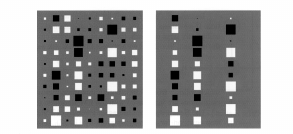

Fig.14 Hinton' diagrams of the matrix W in which each element of the matrix is depicted as a square (white for positive and black for negative values) whose area is proportional to the magnitude of that element. The synthetic data set comprises 300 data points in D= 10 dimensions sampled from a Gaussian distribution having standard deviation 1.0 in 3 directions and standard deviation 0.5 in the remaining 7 directions for a data set in D= 10 dimensions having M = 3 directions with larger variance than the remaining 7 directions. The left-hand plot shows the result from maximum likelihood probabilistic PCA, and the left-hand plot shows the corresponding result from Bayesian PCA. We see how the Bayesian model is able to discover the appropriate dimensionality by suppressing the 6 surplus degrees of freedom.

Fig.14 Hinton diagrams of the matrix $ W $ in which each element of the matrix is depicted as a square (white for positive and black for negative values) whose area is proportional to the magnitude of that element. The synthetic data set comprises 300 data points in $ D = 10 $ dimensions sampled from a Gaussian distribution having standard deviation 1.0 in 3 directions and standard deviation 0.5 in the remaining 7 directions. The left-hand plot shows the result from maximum likelihood probabilistic PCA, and the right-hand plot shows the corresponding result from Bayesian PCA. We see how the Bayesian model is able to discover the appropriate dimensionality by suppressing the 6 surplus degrees of freedom.

The matrix is taken to have a diagonal rather than an isotropic covariance so that

$$
p(x) = \sqrt{x W x + 4}
$$

where $ W $ is a $ D \times D $ diagonal matrix. Note that the factor analysis model, in common with probabilistic PCA, assumes that the observed variables $ x \in \mathbb{R}^D $ are independent, given the latent variable $ z $. In essence, the factor analysis model is explaining the observed covariance structure of the data by representing the independent variance associated with each coordinate in the matrix and capturing the covariance between variables in the matrix $ W $. In the factor analysis literature, the columns of $ W $, which capture the correlations between observed variables, are called factor loadings, and the diagonal elements of $ V $, which represent the independent noise variances for each of the variables, are called uniquenesses.

The origins of factor analysis are as old as those of PCA, and discussions of factor analysis can be found in the books by Everitt (1984), Bartholomew (1987), and Basilevsky (1994). Links between factor analysis and PCA were investigated by Lawley (1953) and Anderson (1963), who showed that at stationary points of the likelihood function, for a factor analysis model with $ I $, the columns of $ W $ are scaled eigenvectors of the sample covariance matrix, and $ V $ is the average of the discarded eigenvalues. Later, Tipping and Bishop (1999b) showed that the maximum of the log-likelihood function occurs when the eigenvectors comprising $ W $ are chosen to be the principal eigenvectors.

Making use of equation (2.115), we see that the marginal distribution for the observed variables is given by...


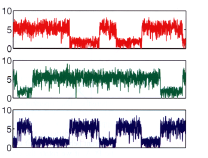

Fig.15 Gibbs sampling for Bayesian PCA showing plots of lo versus beration number for three a values, showing transitions between the three modes of the posterior distribution.

Fig.15 Gibbs sampling for Bayesian PCA showing plots of $ \lambda $ versus iteration number for three $ \alpha $ values, showing transitions between the three modes of the posterior distribution.

$$
p(x) = \sqrt{x}, \quad C = W W^T + \dots
$$

As with probabilistic PCA, this model is invariant to rotations in the latent space. Historically, factor analysis has been the subject of controversy when attempts have been made to place an interpretation on the individual factors (the coordinates in latent space), which has proven problematic due to the non-identifiability of factor analysis associated with rotations in this space. From our perspective, however, we shall view factor analysis as a form of latent variable density model, in which the form of the latent space is of interest but not the particular choice of coordinates used to describe it. If we wish to remove the degeneracy associated with latent space rotations, we must consider non-Gaussian latent variable distributions, giving rise to independent component analysis (ICA) models.

We can determine the parameters $ \mu $, $ W $, and $ V $ in the factor analysis model by maximum likelihood. The solution for $ \mu $ is again given by the sample mean. However, unlike probabilistic PCA, there is no longer a closed-form maximum likelihood solution for $ W $, which must therefore be found iteratively. Because factor analysis is a latent variable model, this can be done using an EM algorithm (Rubin and Thayer, 1982) that is analogous to the one used for probabilistic PCA. Specifically, the E-step equations are given by:

$$
\mathbb{E}[x] = G W^T
$$

$$
G = I + W W^T
$$

Note that this is expressed in a form that involves inversion of matrices of size $ M \times M $ rather than $ D \times D $ (except for the $ D \times D $ diagonal matrix whose inverse is trivial).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating some data for Factor Analysis
np.random.seed(42)

# Parameters
D = 10  # Number of observed dimensions
M = 3   # Number of latent dimensions
N = 300 # Number of data points

# Generating synthetic data: 300 data points in D=10 dimensions
X = np.random.randn(N, M) @ np.random.randn(M, D) + np.random.randn(N, D)

# Factor Analysis Model (EM algorithm)

def factor_analysis_em(X, M, max_iter=100, tol=1e-6):
    N, D = X.shape
    W = np.random.randn(D, M)  # Initial factor loadings
    V = np.eye(D)  # Diagonal noise variance (initial)
    mu = np.mean(X, axis=0)  # Mean of the data

    for i in range(max_iter):
        # E-step: Calculate the posterior of the latent variables (Z)
        X_centered = X - mu  # Center the data
        inv_term = np.linalg.inv(np.dot(W.T, W) + np.eye(M))  # Inverse term for posterior of Z
        Z = np.dot(X_centered, W) @ inv_term.T  # Compute the expected latent variables (Z)
        
        # M-step: Maximize the log-likelihood
        # Update W using the formula
        W_new = np.linalg.solve(np.dot(Z.T, Z) + np.eye(M), np.dot(Z.T, X_centered))
        
        # Update V (noise variance) - we take the diagonal of the residual variance
        residuals = X_centered - np.dot(Z, W_new.T)
        V_new = np.diag(np.var(residuals, axis=0))  # Diagonal variance matrix for each dimension

        # Convergence check
        if np.linalg.norm(W_new - W) < tol and np.linalg.norm(V_new - V) < tol:
            break
        W, V = W_new, V_new
    
    return W, V, mu

# Run the EM algorithm for factor analysis
W, V, mu = factor_analysis_em(X, M)

# Print the learned parameters
print("Learned factor loadings W:\n", W)
print("Learned noise variance V:\n", V)

